Assignment Day 29 - Exploring Other Machine Learning Models With Python (Unsupervised) Part II <br>

Nama : Chintia Hildayanti
Data Science 26

## Import package

In [186]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load Dataset

In [187]:
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

###About The Dataset
MEMBER_NO : ID member <br>
FFP_DATE : frequent flyer program join date <br>
FIRST_FLIGHT_DATE : tanggal penerbangan pertama <br>
GENDER : jenis kelamin <br>
FFP_TIER : tier dari frequent flyer program <br>
WORK_CITY : kota asal <br>
WORK_PROVINCE : provinsi asal <br>
WORK_COUNTRY : negara asal <br>
AGE : umur customer <br>
LOAD_TIME : tanggal data diambil <br>
FLIGHT_COUNT : jumlah penerbangan customer <br>
BP_SUM : rencana perjalanan <br>
SUM_YR_1 : total credit/point di tahun pertama <br>
SUM_YR_2 : total credit/point di tahun kedua <br>
SEG_KM_SUM	: total jarak (km) penerbangan yang sudah dilakukan <br>
LAST_FLIGHT_DATE : tanggal penerbangan terakhir <br>
LAST_TO_END	: jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir <br>
AVG_INTERVAL : rata-rata jarak waktu <br>
MAX_INTERVAL	: maksimal jarak waktu <br>
EXCHANGE_COUNT : jumlah penukaran <br>
avg_discount	: rata-rata discount yang didapat customer <br>
Points_Sum	: jumlah poin yang didapat customer <br>
Point_NotFlight : point yang tidak digunakan oleh members <br>

## Data preprocessing

### A. feature selection

Salah satu metode segmentasi yang paling populer, mudah digunakan, dan efektif untuk membantu pemasar menganalisis perilaku pelanggan adalah analisis RFM.  <br>
Berdasarkan paper, mereka menyarankan untuk menggunakan model LRFMC yang memiliki parameter Length dan Discount Coefficient tambahan saat melakukan segmentasi pelanggan dalam data penerbangan. Jadi, saya mendapatkan model LRFMC sebagai gantinya. <br>
Saya menggunakan Model LRFMC yang umum digunakan dalam dataset penerbangan. LRMFC adalah singkatan dari Length, Recency, Frequency, Monetary, dan Discount Factor. <br>
Rincian setiap parameter diuraikan di bawah ini: <br>

Length: lamanya hari antara hari pertama pendaftaran pelanggan hingga waktu observasi. Angka yang lebih besar berarti mereka telah menjadi anggota dalam waktu yang lebih lama <br>
Recency: lamanya konsumsi terakhir penumpang hingga waktu observasi. Angka yang lebih kecil berarti mereka terbang lebih baru <br>
Frequency: frekuensi konsumsi penumpang dalam jangka waktu tertentu. Angka yang lebih besar berarti mereka terbang lebih sering <br>
Monetary jumlah rata-rata yang dibelanjakan selama jangka waktu tertentu. Angka yang lebih besar berarti mereka menghabiskan lebih banyak uang <br>
Discount Factor: faktor diskon ruang rata-rata untuk penumpang yang bepergian dalam jangka waktu tertentu Angka yang lebih besar berarti mereka lebih banyak menggunakan diskon <br>

Setelah melihat data, saya menggunakan kolom di bawah ini yang terkait dengan fitur LRFMC: <br>

Length: LOAD_TIME - FFP_DATE  <br>
Recency: LAST_TO_END  <br>
Frequency: FLIGHT_COUNT  <br>
Monetary: SEG_KM_SUM <br>
Customer Cost: avg_discount <br>

In [189]:
flight = df[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
flight.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,3/31/2014,11/2/2006,1,210,580717,0.961639
1,3/31/2014,2/19/2007,7,140,293678,1.252314
2,3/31/2014,2/1/2007,11,135,283712,1.254676
3,3/31/2014,8/22/2008,97,23,281336,1.090870
4,3/31/2014,4/10/2009,5,152,309928,0.970658


###B. Feature Engineering

In [190]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LOAD_TIME     62988 non-null  object 
 1   FFP_DATE      62988 non-null  object 
 2   LAST_TO_END   62988 non-null  int64  
 3   FLIGHT_COUNT  62988 non-null  int64  
 4   SEG_KM_SUM    62988 non-null  int64  
 5   avg_discount  62988 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.9+ MB


In [191]:
flight.shape

(62988, 6)

In [192]:
# deteksi missing value

flight.isnull().sum()

,0
LOAD_TIME,0
FFP_DATE,0
LAST_TO_END,0
FLIGHT_COUNT,0
SEG_KM_SUM,0
avg_discount,0


In [193]:
# menghitung length dan mengubah tipe data menjadi integer

flight['LOAD_TIME'] = pd.to_datetime(flight['LOAD_TIME'])
flight['FFP_DATE'] = pd.to_datetime(flight['FFP_DATE'])

flight['L'] = flight['LOAD_TIME'] - flight['FFP_DATE']
flight['L'] = (flight['L'].astype(str).str.split().str[0]).astype(int)

In [194]:
flight = flight[['L', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
flight.columns = ['L','R','F','M','C']
flight.head()

,L,R,F,M,C
0,2706,1,210,580717,0.961639
1,2597,7,140,293678,1.252314
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658


In [195]:
nums = ['L','R','F','M','C']

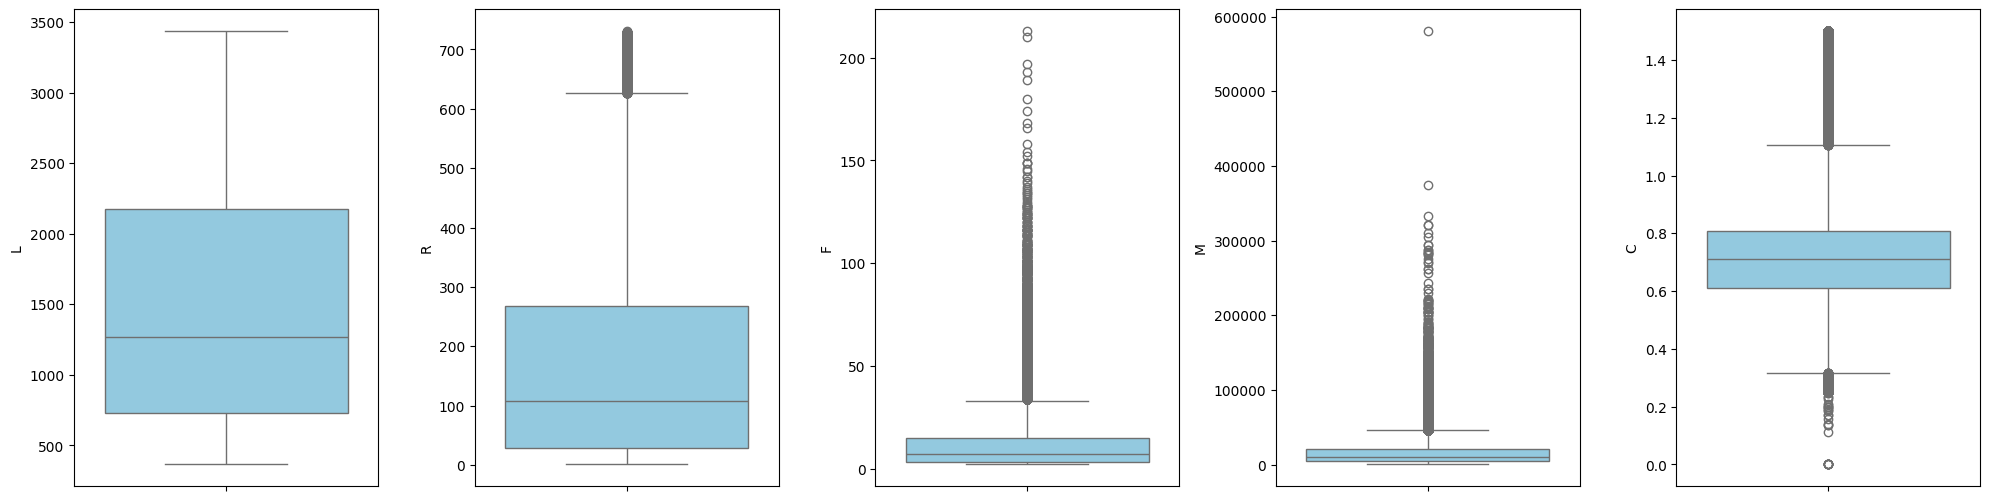

In [196]:
# mendeteksi outlier

plt.figure(figsize=(20,15))
features = nums
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=flight[features[i]], color='skyblue')
    plt.tight_layout()

In [197]:
# saya memilih untuk mengexclude nilai outlier pada SEG_KM_SUM atau monetary > 400.000

flight = flight[flight['M'] <= 400000]

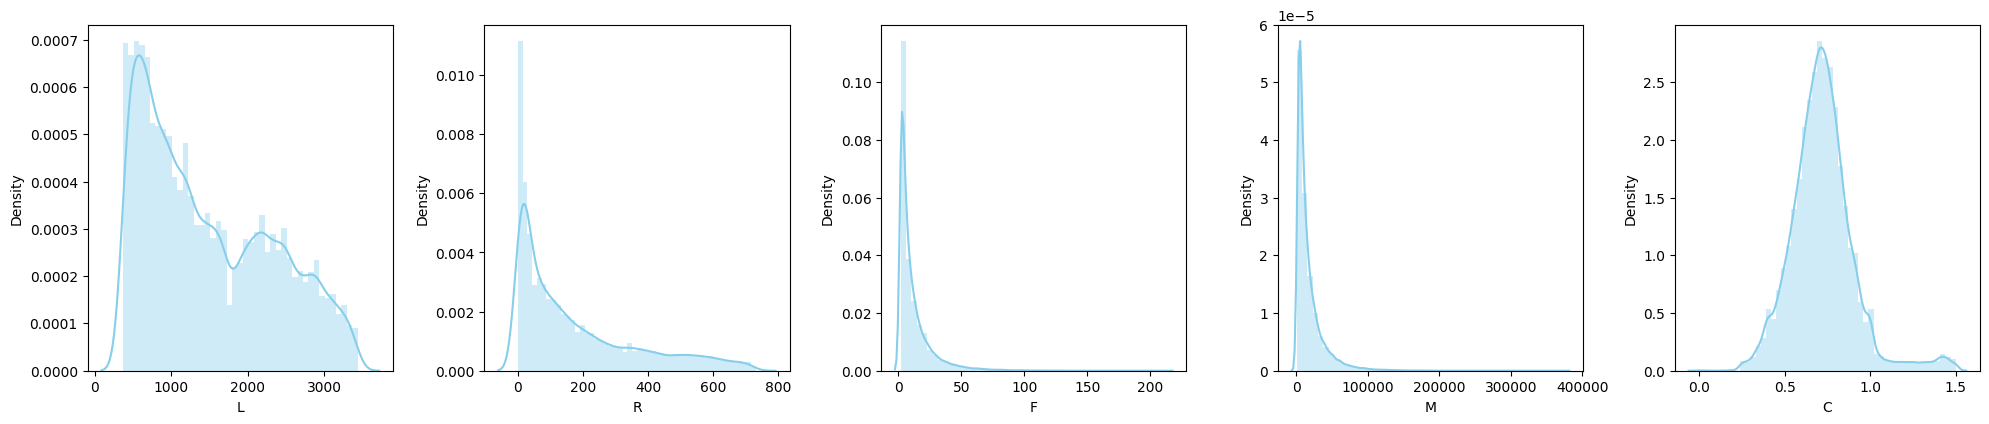

In [198]:
# melihat distribusi data

plt.figure(figsize=(20,12))

for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.distplot(x=flight[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

In [199]:
# normalisasi

flight_std = StandardScaler().fit_transform(flight)
flight_std = pd.DataFrame(data=flight_std, columns=flight.columns)
flight_std.head()

,L,R,F,M,C
0,1.312567,-0.920042,9.136758,13.270652,2.862413
1,1.333813,-0.898281,8.780309,12.792442,2.875146
2,0.663377,-0.430435,0.795859,12.678431,1.991734
3,0.390717,-0.930922,9.992234,14.050395,1.343428
4,0.892364,-0.528356,5.714851,13.314174,1.327435


# Modeling K-Means Clustering Dan Visualisasi Hasil Menggunakan PCA

### Elbow Plot Inertia

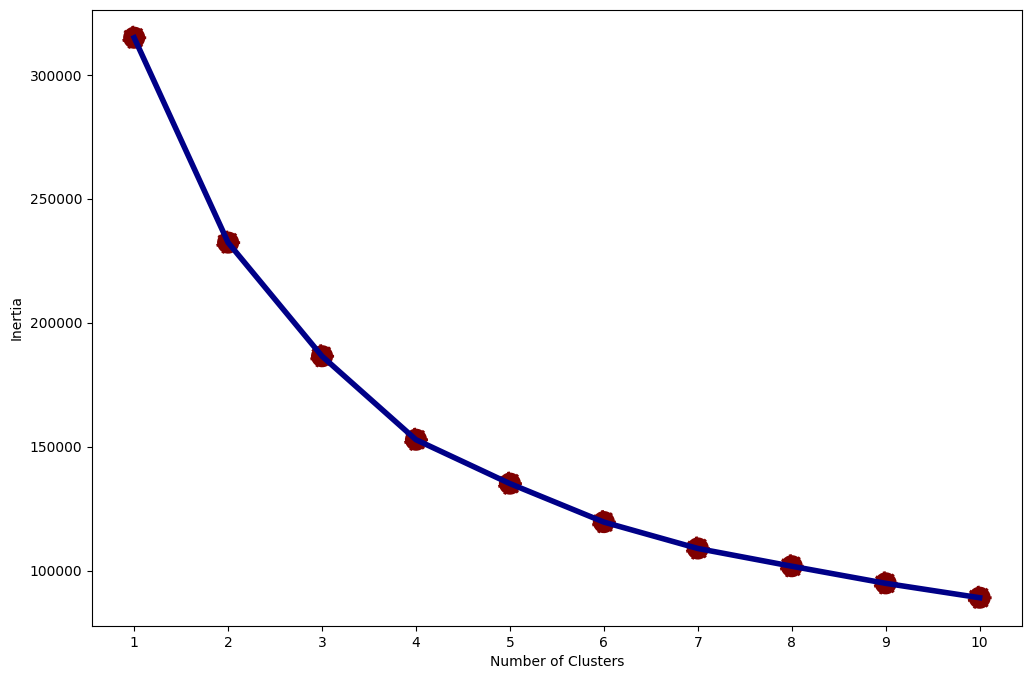

In [200]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(flight_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [201]:
# ada 2 kanditat optimal 5 & 6 yang akan kita coba modelkan

### 5 cluster

In [202]:
flight_std_5 = flight_std.copy()
kmeans_5 = KMeans(n_clusters=5, random_state=0)
kmeans_5.fit(flight_std_5)

KMeans(n_clusters=5, random_state=0)

In [203]:
flight_std_5['cluster_5'] = kmeans_5.labels_
flight_std_5.head()

,L,R,F,M,C,cluster_5
0,1.312567,-0.920042,9.136758,13.270652,2.862413,4
1,1.333813,-0.898281,8.780309,12.792442,2.875146,4
2,0.663377,-0.430435,0.795859,12.678431,1.991734,4
3,0.390717,-0.930922,9.992234,14.050395,1.343428,4
4,0.892364,-0.528356,5.714851,13.314174,1.327435,4


karena data mengandung outlier dan tidak terdistribusi normal:
saya memilih menggunakan median karena median lebih tahan terhadap outlier. Outlier tidak akan mempengaruhi median secara signifikan, sehingga memberikan representasi yang lebih akurat dari pusat klaster ketika data mengandung outlier atau tidak mengikuti distribusi normal.

In [204]:
cluster_5_median = flight_std_5.groupby('cluster_5').agg(['median','count'])
cluster_5_median

L                R                F                M         \
             median  count    median  count    median  count    median  count   
cluster_5                                                                       
0         -0.763072  24704 -0.539236  24704 -0.273486  24704 -0.300857  24704   
1         -0.574807  12443  1.642235  12443 -0.629935  12443 -0.616449  12443   
2         -0.086143   4665 -0.136670   4665 -0.487356   4665 -0.459829   4665   
3          1.127843  15794 -0.539236  15794 -0.202197  15794 -0.226554  15794   
4          0.485144   5381 -0.887401   5381  2.150364   5381  2.012748   5381   

                  C         
             median  count  
cluster_5                   
0         -0.195108  24704  
1         -0.116241  12443  
2          1.630806   4665  
3         -0.116241  15794  
4          0.147616   5381

<Axes: xlabel='PC 1', ylabel='PC 2'>

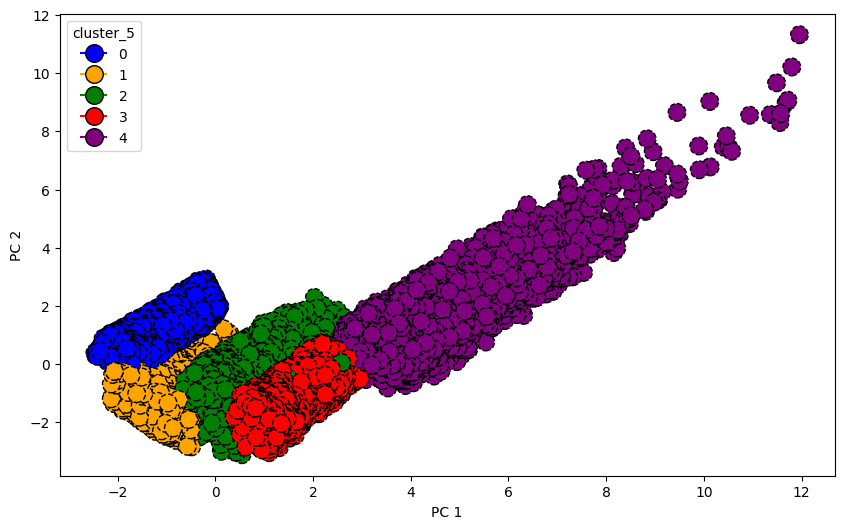

In [205]:
# visualisasi menggunakan PCA

pca = PCA(n_components=2)

pca.fit(flight_std_5)
pcs = pca.transform(flight_std_5)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster_5'] = flight_std_5['cluster_5']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster_5",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red', 'purple'],
    s=160,
    ax=ax
)

### 6 Cluster

In [206]:
flight_std_6 = flight_std.copy()
kmeans_6 = KMeans(n_clusters=6, random_state=0)
kmeans_6.fit(flight_std_6)

KMeans(n_clusters=6, random_state=0)

In [207]:
flight_std_6['cluster_6'] = kmeans_6.labels_
flight_std_6.head()

,L,R,F,M,C,cluster_6
0,1.312567,-0.920042,9.136758,13.270652,2.862413,5
1,1.333813,-0.898281,8.780309,12.792442,2.875146,5
2,0.663377,-0.430435,0.795859,12.678431,1.991734,5
3,0.390717,-0.930922,9.992234,14.050395,1.343428,5
4,0.892364,-0.528356,5.714851,13.314174,1.327435,5


In [208]:
cluster_6_median = flight_std_6.groupby('cluster_6').agg(['median','count'])
cluster_6_median

L                R                F                M         \
             median  count    median  count    median  count    median  count   
cluster_6                                                                       
0          0.099171   2746 -0.365154   2746 -0.344776   2746 -0.317100   2746   
1         -0.786089  23486 -0.468515  23486 -0.344776  23486 -0.368371  23486   
2          0.142844   8075 -0.843881   8075  1.152308   8075  1.101768   8075   
3          1.124892  14684 -0.435875  14684 -0.344776  14684 -0.333127  14684   
4         -0.578348  12194  1.669435  12194 -0.629935  12194 -0.618657  12194   
5          0.818002   1802 -0.909161   1802  3.647449   1802  3.400858   1802   

                  C         
             median  count  
cluster_6                   
0          2.753863   2746  
1         -0.186793  23486  
2          0.042467   8075  
3         -0.116241  14684  
4         -0.053559  12194  
5          0.251425   1802

<Axes: xlabel='PC 1', ylabel='PC 2'>

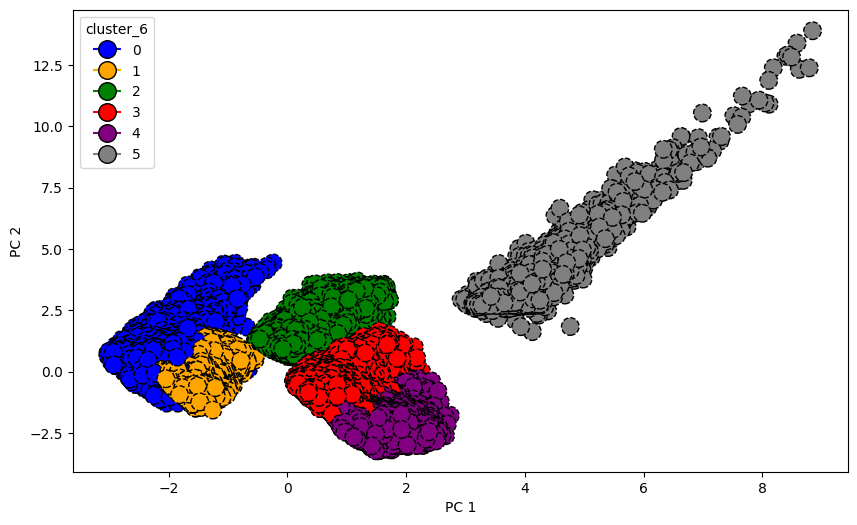

In [210]:
# visualisasi menggunakan PCA

pca_6 = PCA(n_components=2)

pca_6.fit(flight_std_6)
pcs_6 = pca_6.transform(flight_std_6)

data_pca_6 = pd.DataFrame(data = pcs_6, columns = ['PC 1', 'PC 2'])
data_pca_6['cluster_6'] = flight_std_6['cluster_6']
data_pca_6.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster_6",
    edgecolor='black',
    linestyle='--',
    data=data_pca_6,
    palette= ['blue', 'orange', 'green', 'red', 'purple', 'grey'],
    s=160,
    ax=ax
)

# Insight

### 5 cluster

In [211]:
cluster_5_median = flight_std_5.groupby('cluster_5').agg(['median','count'])
cluster_5_median

L                R                F                M         \
             median  count    median  count    median  count    median  count   
cluster_5                                                                       
0         -0.763072  24704 -0.539236  24704 -0.273486  24704 -0.300857  24704   
1         -0.574807  12443  1.642235  12443 -0.629935  12443 -0.616449  12443   
2         -0.086143   4665 -0.136670   4665 -0.487356   4665 -0.459829   4665   
3          1.127843  15794 -0.539236  15794 -0.202197  15794 -0.226554  15794   
4          0.485144   5381 -0.887401   5381  2.150364   5381  2.012748   5381   

                  C         
             median  count  
cluster_5                   
0         -0.195108  24704  
1         -0.116241  12443  
2          1.630806   4665  
3         -0.116241  15794  
4          0.147616   5381

###Analisis Cluster Berdasarkan Median: <br>
####Cluster 0 --> New and Low-Value Customers<br>
•	L: -0.763072 (Lifetime pendek - pelanggan relatif baru)<br>
•	R: -0.539236 (Recency rendah - baru-baru ini berinteraksi)<br>
•	F: -0.273486 (Frequency rendah - tidak sering membeli)<br>
•	M: -0.300857 (Monetary rendah - nilai pembelian rendah)<br>
•	C: -0.195108 (Customer value rendah)<br>

Interpretasi: cluster ini terdiri dari pelanggan baru yang belum banyak berinteraksi atau melakukan pembelian besar<br>
Rekomendasi: Mereka bisa menjadi target kampanye pengenalan produk atau promosi awal. Lakukan onboarding yang efektif dengan penawaran pengenalan dan program loyalitas awal<br>

####Cluster 1 --> At-Risk Customers <br>
•	L: -0.574807 (Lifetime menengah - pelanggan tidak terlalu baru)<br>
•	R: 1.642235 (Recency tinggi - sudah lama tidak berinteraksi)<br>
•	F: -0.629935 (Frequency rendah)<br>
•	M: -0.616449 (Monetary rendah)<br>
•	C: -0.116241 (Customer value rendah)<br>

Interpretasi: Ini adalah pelanggan yang tidak aktif lagi dan sudah lama tidak berinteraksi atau melakukan transaksi<br>
Rekomendasi: Kampanye retensi, seperti pengiriman email atau penawaran khusus, dapat digunakan untuk mencoba menghidupkan kembali minat mereka<br>

####Cluster 2 --> High-Potential New Customers
•	L: -0.086143 (Lifetime pendek - pelanggan baru)<br>
•	R: -0.136670 (Recency rendah - baru-baru ini berinteraksi)<br>
•	F: -0.487356 (Frequency rendah)<br>
•	M: -0.459829 (Monetary rendah)<br>
•	C: 1.630806 (Customer value tinggi)<br>

Interpretasi: Pelanggan baru dengan nilai pelanggan tinggi, meskipun frekuensi dan nilai moneter transaksi mereka rendah<br>
Rekomendasi: Ini bisa menjadi kelompok pelanggan potensial yang perlu lebih banyak difokuskan untuk peningkatan loyalitas<br>

####Cluster 3 --> Long-Time but Low-Engagement Customers
•	L: 1.127843 (Lifetime panjang - pelanggan lama)<br>
•	R: -0.539236 (Recency rendah - baru-baru ini berinteraksi)<br>
•	F: -0.202197 (Frequency menengah)<br>
•	M: -0.226554 (Monetary menengah)<br>
•	C: -0.116241 (Customer value rendah)<br>

Interpretasi: Pelanggan lama yang tetap berinteraksi, tetapi dengan frekuensi dan nilai pembelian yang relatif rendah<br>
Rekomendasi: Mungkin mereka bisa didorong untuk meningkatkan frekuensi dan jumlah pembelian mereka melalui program loyalitas atau penawaran eksklusif<br>

####Cluster 4 --> Loyal and High-Value Customers
•	L: 0.485144 (Lifetime menengah)<br>
•	R: -0.887401 (Recency sangat rendah - sangat baru berinteraksi)<br>
•	F: 2.150364 (Frequency sangat tinggi)<br>
•	M: 2.012748 (Monetary sangat tinggi)<br>
•	C: 0.147616 (Customer value menengah)<br>

Interpretasi: Ini adalah pelanggan aktif dengan frekuensi dan nilai pembelian yang sangat tinggi. Mereka merupakan pelanggan setia yang mungkin telah mendapatkan nilai tinggi dari bisnis<br>
Rekomendasi: Fokus bisa diberikan pada mempertahankan kelompok ini dengan memberikan penghargaan, diskon eksklusif, atau layanan premium.<br>

###6 Cluster

In [212]:
cluster_6_median = flight_std_6.groupby('cluster_6').agg(['median','count'])
cluster_6_median

L                R                F                M         \
             median  count    median  count    median  count    median  count   
cluster_6                                                                       
0          0.099171   2746 -0.365154   2746 -0.344776   2746 -0.317100   2746   
1         -0.786089  23486 -0.468515  23486 -0.344776  23486 -0.368371  23486   
2          0.142844   8075 -0.843881   8075  1.152308   8075  1.101768   8075   
3          1.124892  14684 -0.435875  14684 -0.344776  14684 -0.333127  14684   
4         -0.578348  12194  1.669435  12194 -0.629935  12194 -0.618657  12194   
5          0.818002   1802 -0.909161   1802  3.647449   1802  3.400858   1802   

                  C         
             median  count  
cluster_6                   
0          2.753863   2746  
1         -0.186793  23486  
2          0.042467   8075  
3         -0.116241  14684  
4         -0.053559  12194  
5          0.251425   1802

###Analisis Cluster Berdasarkan Median: <br>

####Cluster 0 --> High Customer Value with Moderate Engagement<br>
•	L : 0.099171 (Sedikit di atas rata-rata, pelanggan tidak terlalu baru)<br>
•	R : -0.365154 (Relatif baru berinteraksi)<br>
•	F : -0.344776 (Frekuensi rendah)<br>
•	M : -0.317100 (Nilai moneter rendah)<br>
•	C : 2.753863 (Customer value sangat tinggi)<br>

Interpretasi: Ini adalah pelanggan dengan nilai tinggi bagi perusahaan, meskipun frekuensi dan nilai moneter transaksi mereka rendah. Mereka mungkin melakukan transaksi besar sekali-sekali atau memiliki potensi besar tetapi kurang terlibat<br>
Rekomendasi: Tingkatkan engagement dengan program khusus atau penawaran eksklusif untuk mendorong mereka bertransaksi lebih sering<br>

####Cluster 1 --> New and Low-Value Customers<br>
•	L : -0.786089 (Lifetime rendah - pelanggan relatif baru)<br>
•	R : -0.468515 (Recency rendah - Baru-baru ini berinteraksi)<br>
•	F : -0.344776 (Frekuensi rendah - tidak sering membeli)<br>
•	M : -0.368371 (Nilai moneter rendah - nilai pembelian rendah)<br>
•	C : -0.186793 (Customer value rendah)<br>

Interpretasi: Kelompok terbesar ini terdiri dari pelanggan baru dengan nilai rendah, baik dalam hal frekuensi maupun nilai moneter<br>
Rekomendasi: Lakukan upaya onboarding yang kuat untuk meningkatkan keterlibatan awal, seperti diskon khusus untuk pembelian berikutnya atau program referral<br>

####Cluster 2 --> High Frequency And High Monetary Value Customers<br>
•	L : 0.142844 (Lifetime sedang - pelanggan tidak terlalu baru)<br>
•	R : -0.843881 (Baru-baru ini berinteraksi)<br>
•	F : 1.152308 (Frekuensi tinggi)<br>
•	M : 1.101768 (Nilai moneter tinggi)<br>
•	C : 0.042467 (Customer value menengah)<br>

Interpretasi: Ini adalah pelanggan yang sangat aktif dengan frekuensi dan nilai moneter tinggi<br>
Rekomendasi: Fokus pada retensi dan peningkatan loyalitas dengan memberikan penghargaan loyalitas atau program VIP untuk memastikan mereka tetap berinteraksi<br>

####Cluster 3 --> Long-Time But Low-Engagement Customers<br>
•	L : 1.124892 (Lifetime tinggi - pelanggan lama)<br>
•	R : -0.435875 (Baru-baru ini berinteraksi)<br>
•	F : -0.344776 (Frekuensi rendah)<br>
•	M : -0.333127 (Nilai moneter rendah)<br>
•	C : -0.116241 (Customer value rendah)<br>

Interpretasi: Pelanggan ini telah lama berinteraksi dengan bisnis, tetapi frekuensi dan nilai transaksi mereka rendah<br>
Rekomendasi: Tawarkan penawaran eksklusif atau program reaktivasi untuk mendorong mereka kembali aktif dan meningkatkan nilai transaksi mereka<br>

####Cluster 4 --> At-Risk Customers<br>
•	L : -0.578348 (Lifetime menengah)<br>
•	R : 1.669435 (Sudah lama tidak berinteraksi)<br>
•	F : -0.629935 (Frekuensi rendah)<br>
•	M : -0.618657 (Nilai moneter rendah)<br>
•	C : -0.053559 (Customer value rendah)<br>

Interpretasi: Pelanggan dalam kelompok ini berisiko churn karena mereka sudah lama tidak berinteraksi dan memiliki frekuensi serta nilai transaksi yang rendah<br>
Rekomendasi: Jalankan kampanye retensi seperti email follow-up atau penawaran khusus untuk menarik mereka kembali<br>

####Cluster 5 --> Loyal and High-Value Customers<br>
•	L : 0.818002 (Lifetime tinggi)<br>
•	R : -0.909161 (Baru-baru ini berinteraksi)<br>
•	F : 3.647449 (Frekuensi sangat tinggi)<br>
•	M : 3.400858 (Nilai moneter sangat tinggi)<br>
•	C : 0.251425 (Customer value tinggi)<br>

Interpretasi: Ini adalah kelompok pelanggan terbaik dengan engagement dan nilai moneter yang sangat tinggi<br>
Rekomendasi: Fokus pada retensi dengan memberikan pengalaman personal, layanan premium, atau penghargaan eksklusif untuk memastikan mereka tetap setia dan merasa dihargai.<br>

##Kesimpulan :
Model K-Means Clustering dengan 6 cluster terlihat lebih baik dibandingkan 5 cluster, karna lebih berjarak dan tidak terlalu dekat atau menempel seperti 5 cluster. dan pada model 6 cluster juga tidak ada warna yang tercampur seperti pada model 5 cluster (merah & hijau)